# Introduction to Bayesian Analysis
Aaron Y. Chan  
1/28/2016  
BYU DSC  

## Advantages

* Not much data, many explanatory variables
* Want to avoid overfitting
* Can inject prior beliefs
* Conditional on the prior we choose, model gives us predictions of lowest expected loss!  Renowned Bayesian statistician Dennis Lindley oft repeated the phrase "turning the Bayesian crank"

## Getting Started
### Simple, motivating example
Suppose we have a set of data of size K, $y, n$, where $y_1,...,y_K, n_1,...,n_K$.  For a simple, intuitive example, let's suppose that $y_i$ denotes the number of home runs that Barry Bonds hit out of $n_i$ at-bats.  With this data, it would be easy to tell you how **likely** the data happened **given** Barry Bonds' home-run hitting probability.  These would be just 3 rows of data: 

| n | y |
|-------|
| 3 | 1 |
| 4 | 0 |
| 4 | 0 |

Assuming each hit is independent, we can summarize the data by summing $\Sigma_{i=1}^Ky_i, \Sigma_{i=1}^Kn_i$.  For this data set, the total number of at-bats was 476, and the total number of home runs was 73.

So, I'm telling you that if you told me that Barry Bonds' home run hitting percentage was 35%, I could tell you how likely the above data heppened.  Using a binomial distribution, denoted by $\binom{n}{x}\theta^x(1 - \theta)^{n - x}$ with $\theta$ = home run percentage:



In [10]:
%matplotlib inline
from scipy import stats
from matplotlib import pyplot as plt
rv = stats.binom(476, 0.35) # Initialize Binominal distribution w n = 476, theta = 0.35
print rv.pmf(73) # How likely was it that 73 hits were home runs?

4.03968150144e-22


Some of you might be wondering why the probability is so fantastically low.  Since the binomial distribution is a probability distribution, it integrates to 1.  Thus, we should be more focused on relative probability densities than the density itself.  Notice that in the below graph, the densities never reach higher than 0.04.

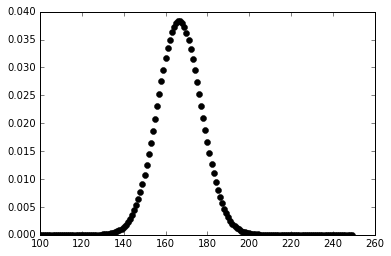

In [12]:
x = range(100, 250)
probability = stats.binom.pmf(x, 476, 0.35)
plt.plot(x, probability, "o", color = "black")

### Problem

The issue is that maybe we want to know $\theta$, and all we have is data.  What we have is called the **likelihood function**, and we'll denote it by $f(y | \theta)$.  Bayes theorem tells us that we can swap the conditions so that we have some $g(\theta | y)$.  Recall that Bayes theorem says:

$$
\begin{align*}
Pr(A | B) = \frac{Pr(B | A)*Pr(A)}{\Pr(B)}
\end{align*}
$$

Plugging in, we have:

$$
\begin{align*}
g(\theta | y) &= \frac{f(y | \theta) * \pi(\theta)}{\int_0^1f(y | \theta) * \pi(\theta)d\theta}
\end{align*}
$$
  
  
You might be confused about some of these elements.  Why is there an integral term on the bottom?  What is this $\pi(\theta)$?  
  
I'll tell you about the integral term.  Notice that in Bayes theorem, we have Pr(B), and this would be the probability of the data.  How do you get that?  You would have to integrate the parameters out of the joint probability density.  
  
As for the $\pi(\theta)$, we don't have it yet.  $\pi(\theta)$ is a probability distribution that **we** choose, and we form it based on our **prior beliefs**.  Since we're talking about a probability, $\theta$, I will use the Beta distribution to show my prior beliefs.  
  
If you're wondering where all these distributions are coming from, it's simply because there are some common ones that statisticians use, that happen to fit a variety of situations.  A binomial distribution is great for success/failure outcomes with independent trials.  A beta distribution has the domain [0, 1] and integrates to 1, which makes it ideal for representing probability distributions **on probabilities.**  

The probability density function for the beta distribution is as follows:

$$
\begin{align*}
\pi(\theta | a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\theta^{a - 1}(1 - \theta)^{b - 1}
\end{align*}
$$

Notice that these distributions have "settings," namely a and b, which remain constant.  These determine the shape of our distribution.
  
I'm going to take a guess that Bonds' true home run hitting percentage is around 0.11.  I'm somewhat certain about my guess, so I'll say that our prior distribution, $\pi(\theta | a, b)$ follows Beta(49, 431).  Here's a plot.

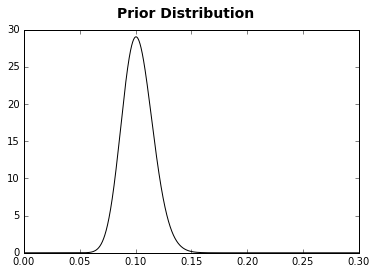

In [39]:
x = map(lambda x: x/10000.0, range(0, 3000));
prior = stats.beta(49, 431)
plt.plot(x, prior.pdf(x), 'k-', lw=1, label='prior pdf')
plt.suptitle('Prior Distribution', fontsize=14, fontweight='bold')

Now we have all the pieces to complete Bayes theorem.  Let's step through it.

$$
\begin{align*}
g(\theta | y) &= \frac{f(y | \theta)\pi(\theta | a, b)}{P(y)}\\[2ex]
&= \Pi_{i=1}^{n}\frac{\binom{n_i}{y_i}\theta^{y_i}(1 - \theta)^{n_i - y_i})\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\theta^{a - 1}(1 - \theta)^{b - 1}}{\int_0^1\binom{n_i}{y_i}(\theta^*)^{y_i}(1 - \theta^*)^{n_i - y_i}\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}(\theta^*)^{a - 1}(1 - \theta^*)^{b - 1}d\theta}\\[2ex]
&= \frac{\Pi_{i=1}^{n}(\binom{n_i}{y_i})\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\theta^{\Sigma_{i=1}^{n}y_i}(1 - \theta)^{\Sigma_{i=1}^{n}n_i - y_i})\theta^{a - 1}(1 - \theta)^{b - 1}}{\Pi_{i=1}^{n}(\binom{n_i}{y_i})\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\int_0^1(\theta^*)^{\Sigma_{i=1}^{n}y_i}(1 - \theta^*)^{\Sigma_{i=1}^{n}n_i - y_i}(\theta^*)^{a - 1}(1 - \theta^*)^{b - 1}d\theta}\\[2ex]
&\text{Note that the combinations and gamma terms cancel,}\\
&= \frac{\theta^{\Sigma_{i=1}^{n}(y_i) + a - 1}(1 - \theta)^{\Sigma_{i=1}^{n}(n_i - y_i) + b - 1}}{\frac{\Gamma(\Sigma_{i=1}^{n}(y_i) + a)\Gamma(\Sigma_{i=1}^{n}(n_i - y_i) + b)}{\Gamma(\Sigma_{i=1}^{n}(y_i) + a +  \Sigma_{i=1}^{n}(n_i - y_i) + b)}\int_0^1\frac{\Gamma(\Sigma_{i=1}^{n}(y_i) + a + \Sigma_{i=1}^{n}(n_i - y_i) + b)}{\Gamma(\Sigma_{i=1}^{n}(y_i) + a)\Gamma(\Sigma_{i=1}^{n}(n_i - y_i) + b)}(\theta^*)^{\Sigma_{i=1}^{n}y_i + a - 1}(1 - \theta^*)^{\Sigma_{i=1}^{n}(n_i - y_i) + b - 1}d\theta}\\[2ex]
&\text{Note that the integral term now goes to 1, by definition}\\[2ex]
&= \frac{\Gamma(\Sigma_{i=1}^{n}(y_i) + a +  \Sigma_{i=1}^{n}(n_i - y_i) + b)}{\Gamma(\Sigma_{i=1}^{n}(y_i) + a)\Gamma(\Sigma_{i=1}^{n}(n_i - y_i) + b)}\theta^{\Sigma_{i=1}^{n}(y_i) + a - 1}(1 - \theta)^{\Sigma_{i=1}^{n}(n_i - y_i) + b - 1}\\[2ex]
\pi(\theta | y) &\sim \text{Beta}(a + \Sigma_{i=1}^{n}(y_i), b + \Sigma_{i=1}^{n}(n_i - y_i))
\end{align*}
$$

Notice what happens here - instead of having to calculate a bunch of really hard things, I rearranged everything into another Beta distribution.  This demonstrates a **conjugate prior** relationship, where it turns out that the **posterior** distribution is of the same **family of distributions** as the prior, such that they are both Beta distributions.

What the conjugate prior tells us is that in order to obtain $g(\theta | y)$, all we do is add $\Sigma_{i=1}^Ky_i$ to a and $\Sigma_{i=1}^K(n_i - y_i)$ to b, forming another beta distribution.

In [3]:
xlim = map(lambda x: x / 10000.0, range(0, 3000))
astar = 49 + 73
bstar = 431 + (476 - 73)
maxlikelihood = 73/476.0
posterior = stats.beta(astar, bstar)
plt.plot(xlim, posterior.pdf(xlim), 'k-', lw=1, label='posterior pdf')
plt.plot(xlim, prior.pdf(xlim), 'k-', lw=1, color="green", label="prior pdf")
plt.axvline(x=maxlikelihood, ymin=0, ymax=1, label="max likelihood")
plt.suptitle('Results', fontsize=14, fontweight='bold')
plt.legend()

NameError: name 'stats' is not defined

Thus, given our data and prior, we have a probability distribution on what we believe Barry Bonds' home-run hitting percentage is (in 2001).  
  
A few key points here:
1.  Notice the vertical blue line.  This is what the "maximum likelihood" would be, given the data.  That is, it's the value of $\theta$ that would have produced **the highest** probability from $f$.  We could use this, but note that it doesn't leave any room for uncertainty!  What if we had only 4 data points, and Barry Bonds had hit 0 home runs?  It would be ridiculous to claim that $\theta$ = 0.  With Bayesian methods we can insert a **sensible** prior distribution that gives us a starting point.
2.  Notice that with small new additions of data, we can update the model in a proportionally small way.  See how the spread of the black distribution is smaller than that of the green?  This is because we are more certain of what $\theta$ is.

## In the context of Kaggle

Bayesian analysis lets us work of small data sets where there are many variables.  We can use our own prior knowledge to assist our models, and we can avoid the overfitting that might happen when using optimization based methods.  
   
But do people actually use this?  Yes they do!  Tim Salisman, one of the more known data scientists on Kaggle, won a contest, "Don't overfit" using Bayesian methods.  That data set had 20,000 rows but only 250 rows of training data, with 200 explanatory variables.  His model had the highest AUC.  
  
But how did he do the analysis on so many variables?

## Further techniques
### Gibbs Sampling

Remember how we found the posterior distribution on $\theta$ using Bayes theorem?  It turns out that you can use Bayes theorem with a bunch of variables - as many as you'd like.

However, you'll get something like (ex: the Weibull distribution with 2 parameters):

$$
\begin{align*}
\pi(\lambda | \text{data}, g, p, \beta) &= \Pi_{i=1}^n\frac{\frac{\beta}{\lambda}(x)^{\beta-1}e^{-(\frac{x^\beta}{\lambda})}\frac{p^g}{\Gamma(g)}\frac{1}{\lambda}^{g + 1}e^{\frac{-p}{\lambda}}}{\int_0^1\frac{\beta}{\lambda}(x)^{\beta-1}e^{-(\frac{x^\beta}{\lambda})}\frac{p^g}{\Gamma(g)}\frac{1}{\lambda}^{g + 1}e^{\frac{-p}{\lambda}}d\lambda}\\
\end{align*}
$$

Suddenly things don't look so nice anymore.  Most of the time, they won't.


There is a whole class of methods called Markov Chain Monte Carlo sampling, and they were made to computationally sample from "full joint" posterior distributions like the one above.  One of the classics is Gibbs sampling (and there are a bunch of techniques built on top of Gibbs sampling as well).  This is the technique that Tim Salisman used in his analysis.

Gibbs sampling seems slightly funny at first.
1.  For every parameter you have, say $\theta_1,...,\theta_K$, set a randomized initial value.
2.  Find the "full conditional distribution" for that parameter, where the rest of the variables are held constant.
3.  Update the variable by sampling from the full conditional distribution, given all the other $\theta$.  Hopefully the full conditional is one you can tractably sample from.  Otherwise, you'll need another algorithm (Metropolis Hastings, for example).
4.  Keep cycling between variables until you get many draws.

The draws that you obtain by Gibbs sampling will **end up being from the full joint posterior**.  Why is this?

It turns out that what you're constructing is a Markov chain, which satisfies the Markov property:
$$
\begin{align*}
p(\theta_x | \theta_1,...\theta_{x - 1}) = p(\theta_x | \theta_{x - 1})
\end{align*}
$$

Futhermore, you're constructing an **ergodic** Markov chain, which means that the Markov chain is aperiodic, irreducible, and positive recurrent (it doesn't get stuck in a repeating loop, it can go to any state (could take more than 1 step), and it can eventually come back to any point).

Do you know about the strong law of large numbers?  It's essentially that if you draw a sequence of independent and identically distributed random variables, each one with a finite mean, then the mean of all those draws approaches the expected value.  Essentially, it guarantees stable results in the long term for averages of random events.

The ergodic theorem of the Markov chain guarantees something similar - that we will converge onto the full joint distribution with **enough** draws.  "Enough" depends, but it's definitely computationally feasible.

If you're curious, the Hammersley-Clifford Theorem shows that you can construct the full joint posterior from the full conditionals.


In [2]:
xlim = map(lambda x: x / 10000.0, range(-3000, 3000))
y = [8, 12, 10, 14, 2, 0, 0]
muPrior = stats.norm(-5, 25)
plt.plot(xlim, muPrior.pdf(xlim), 'k-', lw=1, label='posterior pdf')


NameError: name 'stats' is not defined